In [1]:
from keras.datasets import cifar10
from keras.utils import np_utils
from matplotlib import pyplot as plt
import numpy as np
from PIL import Image

Using TensorFlow backend.


In [2]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 74s 0us/step


In [3]:
print('Training Images: {}'.format(X_train.shape))
print('Testing Images: {}'.format(X_test.shape))

Training Images: (50000, 32, 32, 3)
Testing Images: (10000, 32, 32, 3)


In [4]:
print(X_train[0].shape)

(32, 32, 3)


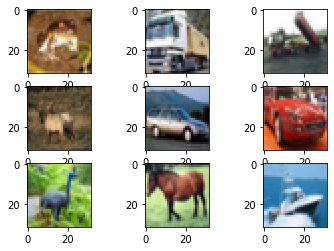

In [7]:
# create a grid of 3x3 images
for i in range(0,9):
    plt.subplot(i+1+330)
    img = X_train[i].transpose([0,1,2])
    plt.imshow(img)
    
# show the plot
plt.show()

In [8]:
# Building a convolutional neural network for object recognition on CIFAR-10

# fix random seed for reproducibility
seed = 6
np.random.seed(seed) 

# load the data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# normalize the inputs from 0-255 to 0.0-1.0
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255.0
X_test = X_test / 255.0

In [9]:
print(y_train.shape)
print(y_train[0])

(50000, 1)
[6]


In [10]:
Y_train = np_utils.to_categorical(y_train)
Y_test = np_utils.to_categorical(y_test)
num_classes = Y_test.shape[1]

print(Y_train.shape)
print(Y_train[0])

(50000, 10)
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


### CNN Model Description
Input 32 × 32 RGB image

3 × 3 conv. 96 ReLU
3 × 3 conv. 96 ReLU
3 × 3 max-pooling stride 2

1 × 1 conv. 192 ReLU
3 × 3 conv. 192 ReLU
3 × 3 max-pooling stride 2

3 × 3 conv. 192 ReLU
1 × 1 conv. 192 ReLU
1 × 1 conv. 10 ReLU

global averaging over 6 × 6 spatial dimensions

10 or 100-way softmax

### Building the all CNN model

In [12]:
from keras.models import Sequential
from keras.layers import Dropout, Activation, Conv2D, GlobalAveragePooling2D
from keras.optimizers import SGD
#SGD is stochastic gradient descent Dropout refers to droping out hidden or visible units

def allcnn(weights = None):
    model = Sequential()
    
    model.add(Conv2D(96,(3,3), padding = 'same', input_shape=(32,32,3)))
    model.add(Activation('relu'))
    model.add(Conv2D(96,(3,3), padding = 'same'))
    model.add(Activation('relu'))
    model.add(Conv2D(96,(3,3), padding = 'same', strides=(2,2)))
    model.add(Dropout(0.5))
    model.add(Conv2D(192,(3,3), padding = 'same'))
    model.add(Activation('relu'))
    model.add(Conv2D(192,(3,3), padding = 'same'))
    model.add(Activation('relu'))
    model.add(Conv2D(192,(3,3), padding = 'same', strides=(2,2)))
    model.add(Dropout(0.5))
    model.add(Conv2D(192, (3, 3), padding = 'same'))
    model.add(Activation('relu'))
    model.add(Conv2D(192, (1, 1), padding = 'valid'))
    model.add(Activation('relu'))
    model.add(Conv2D(10, (1, 1), padding = 'valid'))
    
    # add GlobalAveragePooling2D layer with Softmax activation
    #Softmax is used to map the non-normalized output of a network to a probability distribution over predicted output classes.
    model.add(GlobalAveragePooling2D())
    model.add(Activation('softmax'))

    # load the weights
    if weights:
        model.load_weights(weights)
    
    # return model
    return model

### Defining pattern training model
Do not run below cell as without using tensorflow gpu it will take 500hrs to execute and with gpu it would take 10 hrs approx.

In [13]:
# define hyper parameters
learning_rate = 0.01
#When training neural networks, it is common to use "weight decay," where after each update, the weights are multiplied by a factor slightly less than 1. 
#This prevents the weights from growing too large, and can be seen as gradient descent on a quadratic regularization term.
weight_decay = 1e-6

momentum = 0.9

# build model 
model = allcnn()

# define optimizer and compile model
sgd = SGD(lr=learning_rate, decay=weight_decay, momentum=momentum, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

# print model summary
print (model.summary())

# define additional training parameters
epochs = 350
batch_size = 32

# fit the model
model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=epochs, batch_size=batch_size, verbose = 1)

W0328 20:21:11.409514  9680 deprecation.py:506] From C:\ProgramData\Anaconda3\new\lib\site-packages\tensorflow_core\python\ops\resource_variable_ops.py:1630: calling BaseResourceVariable.__init__ (from tensorflow.python.ops.resource_variable_ops) with constraint is deprecated and will be removed in a future version.
Instructions for updating:
If using Keras pass *_constraint arguments to layers.


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 96)        2688      
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 96)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 96)        83040     
_________________________________________________________________
activation_2 (Activation)    (None, 32, 32, 96)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 96)        83040     
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 96)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 192)      

W0328 20:21:16.034199  9680 module_wrapper.py:139] From C:\ProgramData\Anaconda3\new\lib\site-packages\keras\backend\tensorflow_backend.py:422: The name tf.global_variables is deprecated. Please use tf.compat.v1.global_variables instead.



Train on 50000 samples, validate on 10000 samples
Epoch 1/350
 9152/50000 [====>.........................] - ETA: 13:59 - loss: 2.2894 - accuracy: 0.1225

KeyboardInterrupt: 

To avoid this I have used a file having all cnn pretrained weights

In [14]:
# define hyper parameters
learning_rate = 0.01
weight_decay = 1e-6
momentum = 0.9

weights = 'all_cnn_weights_0.9088_0.4994.hdf5'
model = allcnn(weights)

sgd = SGD(lr = learning_rate,decay = weight_decay,momentum = momentum,nesterov = True)
#Nesterov Momentum (also called Nesterov Accelerated Gradient/NAG) are slight variations of normal gradient descent 
#that can speed up training and improve convergence significantly
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

print (model.summary())

# test the model with pretrained weights
scores = model.evaluate(X_test, Y_test, verbose=1)
print("Accuracy: %.2f%%" % (scores[1]*100))

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 32, 32, 96)        2688      
_________________________________________________________________
activation_8 (Activation)    (None, 32, 32, 96)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 32, 32, 96)        83040     
_________________________________________________________________
activation_9 (Activation)    (None, 32, 32, 96)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 16, 16, 96)        83040     
_________________________________________________________________
dropout_3 (Dropout)          (None, 16, 16, 96)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 16, 16, 192)      

### Making Predictions

In [15]:
# make dictionary of class labels and names
classes = range(0,10)

names = ['airplane',
        'automobile',
        'bird',
        'cat',
        'deer',
        'dog',
        'frog',
        'horse',
        'ship',
        'truck']

# zip the names and classes to make a dictionary of class_labels
class_labels = dict(zip(classes, names))

# generate batch of 9 images to predict
batch = X_test[100:109]
labels = np.argmax(Y_test[100:109],axis=-1)

# make predictions
predictions = model.predict(batch, verbose = 1)

9/9 [==============================] - 0s 19ms/step


In [17]:
print(predictions)

[[4.5647234e-18 1.0580984e-20 1.8923278e-10 2.1411404e-11 9.9999928e-01
  2.8037445e-07 3.1478666e-13 4.2381450e-07 1.3699557e-19 1.2097066e-18]
 [2.1190902e-16 2.0386626e-17 1.5672676e-09 5.3581510e-07 1.6256110e-10
  9.9999940e-01 1.6712491e-09 2.0782188e-08 3.6548053e-15 3.5128330e-16]
 [1.2720517e-30 5.0274027e-28 5.1540022e-24 3.6051544e-21 1.0875264e-27
  8.1522779e-22 1.0000000e+00 1.1050992e-27 6.1924619e-32 1.2274381e-23]
 [1.5143771e-16 4.7668690e-18 2.2583695e-09 1.0000000e+00 4.3481128e-11
  1.6884179e-12 4.5317125e-13 2.6686954e-16 7.2659426e-19 6.2049710e-17]
 [8.2502348e-36 1.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 9.3568045e-36 8.6868626e-30 8.2192576e-22]
 [5.9699731e-24 1.0000000e+00 7.5485268e-27 8.0228679e-27 1.9714101e-30
  2.7338925e-29 7.2188490e-31 5.5680368e-27 1.6186991e-26 1.1906196e-13]
 [6.4563792e-18 2.9642424e-20 1.0046514e-11 9.9999988e-01 6.0156128e-13
  9.1111502e-08 7.8874797e-12 1.1608745e-15 7.8588063e-21 

In [18]:
# use np.argmax() to convert class probabilities to class labels
class_result = np.argmax(predictions,axis=-1)
print(class_result)

[4 5 6 3 1 1 3 6 8]


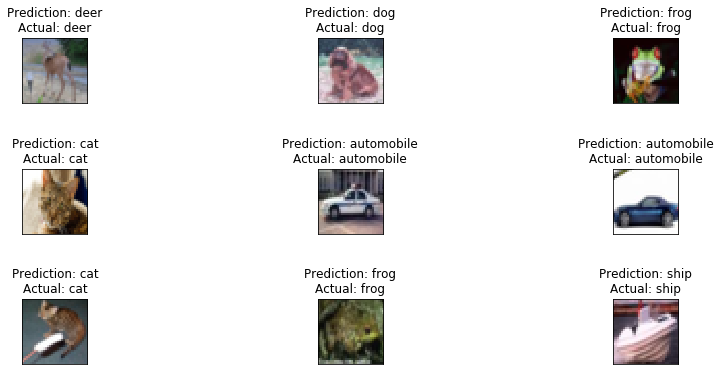

In [22]:
# create a grid of 3x3 images
fig, axs = plt.subplots(3, 3, figsize = (15, 6))
fig.subplots_adjust(hspace = 1)
axs = axs.flatten()

for i, img in enumerate(batch):

    # determine label for each prediction, set title
    for key, value in class_labels.items():
        if class_result[i] == key:
            title = 'Prediction: {}\nActual: {}'.format(class_labels[key], class_labels[labels[i]])
            axs[i].set_title(title)
            axs[i].axes.get_xaxis().set_visible(False)
            axs[i].axes.get_yaxis().set_visible(False)
            
    # plot the image
    axs[i].imshow(img.transpose([0,1,2]))
    
# show the plot
plt.show()